# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import FeatureHasher

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

plt.style.use('ggplot')

## Part 1 - Pairwise Correlations

   <font size="+1">Creating a "train" Dataframe which consists of data from train.csv.</font>
   - <font size = "+1">filtering out 12 colomns from the train dataframe which I think are some of the most interesting variables.</font>
   - <font size = "+1">Now, performing a pairwise pearson correlation on these variable </font>

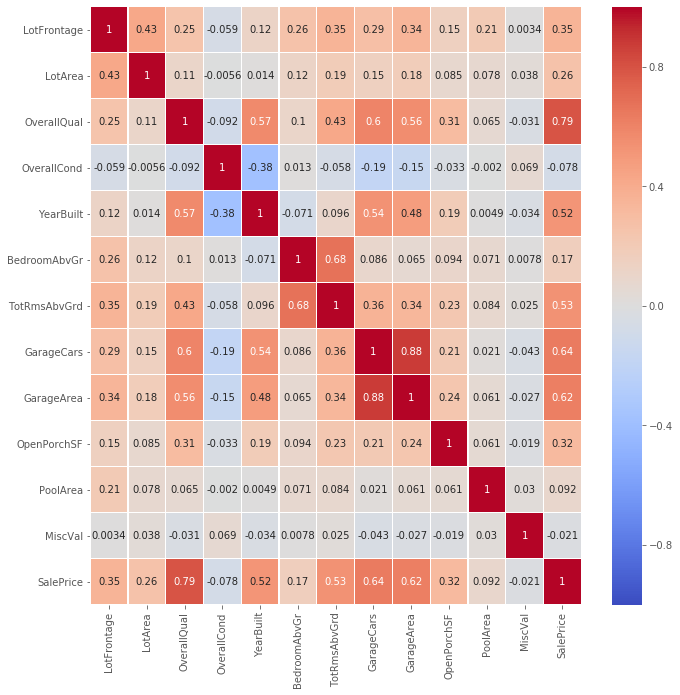

In [4]:
train = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')
train_1 = train.filter(['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','TotRmsAbvGrd','Fireplaces ','GarageCars','GarageArea','OpenPorchSF','PoolArea','MiscVal','SalePrice']) 
plt.figure(figsize=(11,11))
sns.heatmap(train_1.corr(),vmin=-1,vmax=1,cmap='coolwarm',linewidths=0.2,annot=True);

### Finding the most positive and negative correlations.

In [401]:
c = train_1.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
print (so)

SalePrice     SalePrice       1.000000
MiscVal       MiscVal         1.000000
LotArea       LotArea         1.000000
OverallQual   OverallQual     1.000000
OverallCond   OverallCond     1.000000
YearBuilt     YearBuilt       1.000000
BedroomAbvGr  BedroomAbvGr    1.000000
GarageCars    GarageCars      1.000000
GarageArea    GarageArea      1.000000
OpenPorchSF   OpenPorchSF     1.000000
PoolArea      PoolArea        1.000000
TotRmsAbvGrd  TotRmsAbvGrd    1.000000
LotFrontage   LotFrontage     1.000000
GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  BedroomAbvGr    0.676620
GarageCars    SalePrice       0.640409
SalePrice     GarageCars      0.640409
GarageArea    SalePrice       0.623431
SalePrice     GarageArea      0.623431
OverallQual   GarageCars      0.600671
GarageCars    OverallQual     0.600671
OverallQual   YearBuilt  

<font size="+1">From the above result and observing the HeatMap,</font>
- <font size="+1">3 Most Positively correlated pairs:-</font> 
    - <font size="+1">"Garage Cars, Garage Area": 0.882475</font> 
    - <font size="+1">"SalePrice, OverallQual"  : 0.790982</font> 
    - <font size="+1">"SalePrice, GarageCars"   : 0.676620</font>
- <font size="+1">3 Most Negitively correlated pairs:-</font>
    - <font size="+1">"OverallCond, YearBuilt"  : -0.375983</font> 
    - <font size="+1">"OverallCond, GarageCars" : -0.185758</font>
    - <font size="+1">"GarageArea, OverallCond" : -0.151521</font>

## Part 2 - Informative Plots

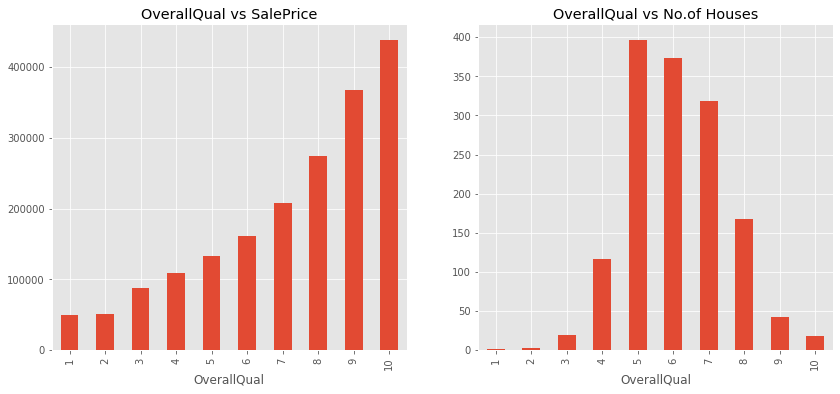

In [415]:
# TODO: code to generate Plot 1
fig, axes = plt.subplots(1, 2,figsize=(14, 6))
train_1.groupby(['OverallQual']).mean()['SalePrice'].plot(kind="bar", ax=axes[0], title='OverallQual vs SalePrice')
train.groupby(['OverallQual']).count()['Id'].plot(kind="bar", ax=axes[1], title='OverallQual vs No.of Houses')

<font size = "+1">What interesting properties does Plot 1 reveal?</font>
- <font size = "+1">From the above left bar graph we can observe that the sale price of the house increases as the OverallQuality of the material and finish of the house increases. But, if we observe the right side plot, the most sold houses have a overallquality around 5-7. From this we can infer that people are willing to compromise on the qualiity of materials used for Saleprice. </font>



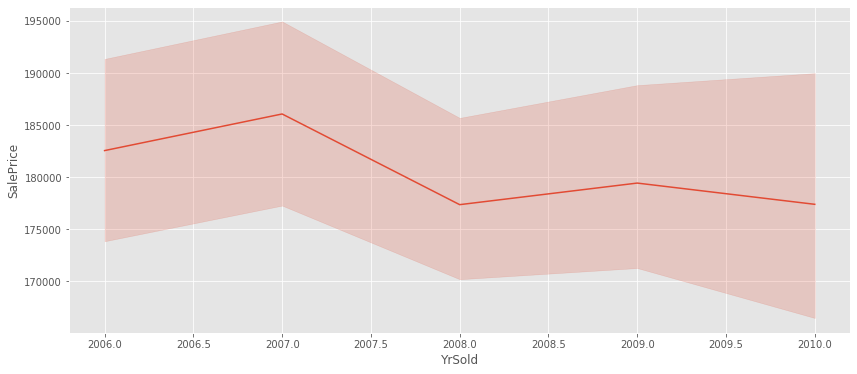

In [414]:
# TODO: code to generate Plot 2
plt.figure(figsize=(14, 6))
sns.lineplot(train['YrSold'],train['SalePrice'])

<font size = "+1">What interesting properties does Plot 2 reveal?</font>
- <font size = "+1"> From the above line plot we can observe that in 2008 there is a dip in the SalePrices of the houses in general. Also 2008 is the year in which recession hit the market. So, because of recession there is a dip in the sales prices of the houses.

Text(0.5, 1.0, 'Garage Cars vs SalePrice')

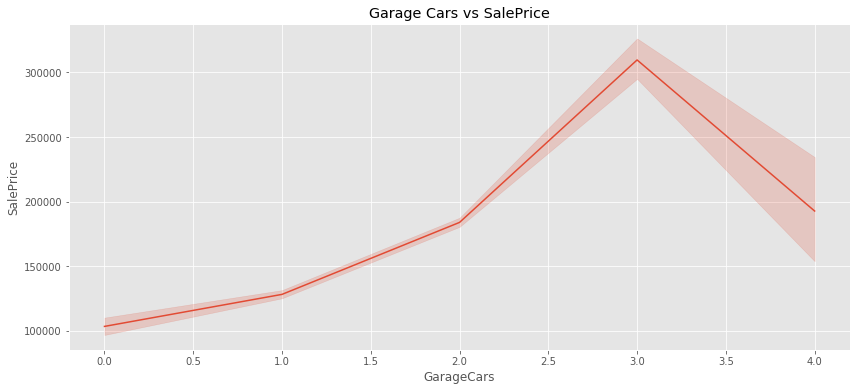

In [413]:
plt.figure(figsize=(14, 6))
sns.lineplot(train['GarageCars'],train['SalePrice']).set_title('Garage Cars vs SalePrice')

<font size = "+1">What interesting properties does Plot 3 reveal?</font>
- <font size = "+1"> From the above line plot we can see that there is a increase in price from GarageCars count 2 to GarageCars count 3 and suprisingly ther is a drop from GarageCars count 3 to GarageCars count 4. From this we can infer that people are more inclined in buying houses with Garage cars size 3 and hence the price for that 3. </font>

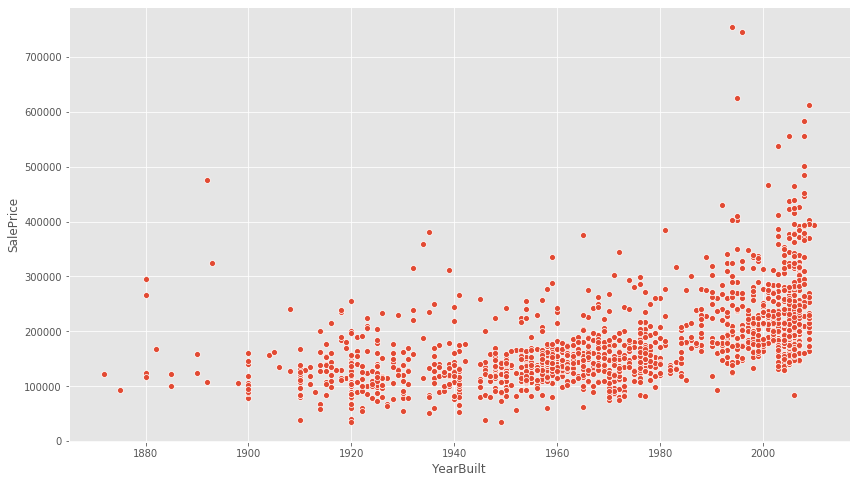

In [412]:
# TODO: code to generate Plot 4
plt.figure(figsize=(14, 8))
sns.scatterplot(train['YearBuilt'],train['SalePrice'])

<font size = +1>What interesting properties does Plot 4 reveal?</font>
- <font size = +1> From the above scatter plot we can observe that the sale price of the houses is gradually increasing per year and also in the recent years count of the number of luxury houses built is also very high.</font>

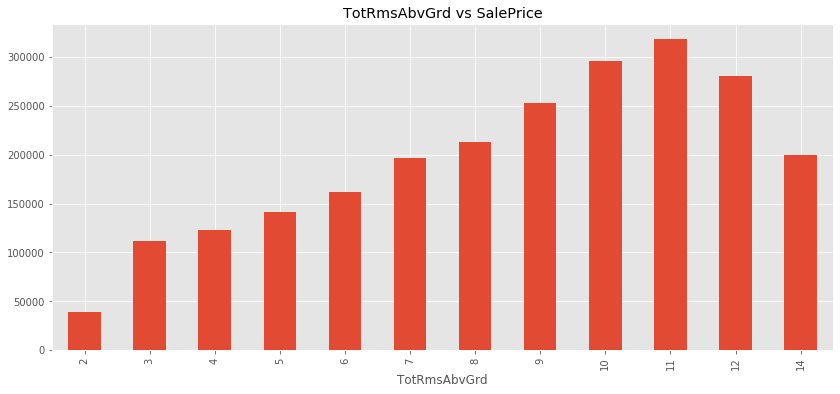

In [420]:
plt.figure(figsize=(14, 6))
train_1.groupby(['TotRmsAbvGrd']).mean()['SalePrice'].plot(kind="bar", title='TotRmsAbvGrd vs SalePrice')
#train.groupby(['TotRmsAbvGrd']).count()['Id'].plot(kind="bar", ax=axes[1], title='OverallQual vs No.of Houses')

<font size = +1>What interesting properties does Plot 5 reveal?</font>
- <font size = +1>From the above graph we can observe that the Saleprice of houses increases as the total number of rooms increases. From this we can infer that total rooms count from 9 to 11 is in more demand and subsequently 12-14 are not in demand.</font>

Text(0.5, 1.0, 'No. of Houses Sold Per Month')

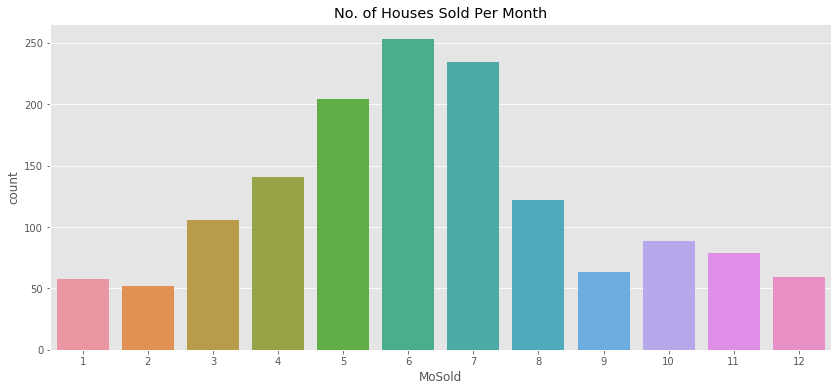

In [421]:
plt.figure(figsize=(14, 6))
sns.countplot(train['MoSold']).set_title('No. of Houses Sold Per Month')

<font size = +1>What interesting properties does Plot 6 reveal?</font>
 - <font size = +1>From the above graph we can infer that during the months of may, june, july the number of houses sold if high when compared to the rest. From this we can say that during summers people are more interested in buying new houses this can be because in winters it gets extremely cold in Iowa.</font>

## Part 3 - Handcrafted Scoring Function

- <font size = "+1">Creating a data frame "q3" and filtering only few features which I think are most interesting.</font>
- <font size = "+1">For the scoring Function to give meaningful results I am  normalizing the values in all the colomns. Now values in all the colomns have scores from 0-10. The weightage of the each colomns is set to 1. So, the score of a particular house is going to be the summation of its feature's scores.And the house with the highest score is the most desirable house." </font>

In [422]:
# TODO: code for scoring function
q3 = train.filter(['LotFrontage','LotArea','LotShape','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','BedroomAbvGr','Fireplaces','GarageCars','GarageArea','GarageQual','FireplaceQu','KitchenQual']) 
q3=q3.fillna(q3.median())

In [423]:
q3['Fireplaces']=q3['Fireplaces'].replace({0:0, 1:3.33,2:6.66,3:9.99})
q3['LotShape']=q3['LotShape'].replace({'Reg':10, 'IR1':7.5, 'IR2':5,'IR3':2.5})
q3['ExterQual']=q3['ExterQual'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2})
q3['ExterCond']=q3['ExterCond'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2})
q3['BsmtQual']=q3['BsmtQual'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2,'NA':0})
q3['BsmtCond']=q3['BsmtCond'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2,'NA':0})
q3['HeatingQC']=q3['HeatingQC'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2})
q3['GarageCars']=q3['GarageCars'].replace({0:2, 1:4,2:6,3:8,4:10})
q3['GarageQual']=q3['GarageQual'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2, 'NA':0})
q3['KitchenQual']=q3['KitchenQual'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2})
q3['FireplaceQu']=q3['FireplaceQu'].replace({'Ex':10, 'Gd':8, 'TA':6,'Fa':4,'Po':2})


In [424]:
q3=q3.fillna(0)

In [425]:
mask = (q3['LotFrontage'] > 60.0) & (q3['LotFrontage'] <= 69.0)
q3['LotFrontage'][mask] = 5
mask = (q3['LotFrontage'] <= 60.0) 
q3['LotFrontage'][mask] = 2.5
mask = (q3['LotFrontage'] > 69.0) & (q3['LotFrontage'] <= 79.0)
q3['LotFrontage'][mask] = 7.5
mask = (q3['LotFrontage'] > 79.0) 
q3['LotFrontage'][mask] = 10

mask = (q3['LotArea'] <= 7553.500000) 
q3['LotArea'][mask] = 2.5
mask = (q3['LotArea'] > 7553.500000) & (q3['LotArea'] <= 9478.500000)
q3['LotArea'][mask] = 5
mask = (q3['LotArea'] > 9478.500000) & (q3['LotArea'] <= 11601.500000)
q3['LotArea'][mask] = 7.5
mask = (q3['LotArea'] > 11601.500000) 
q3['LotArea'][mask] = 10

mask = (q3['GarageArea'] <= 334.500000) 
q3['GarageArea'][mask] = 2.5
mask = (q3['GarageArea'] > 334.500000) & (q3['GarageArea'] <= 480.000000)
q3['GarageArea'][mask] = 5
mask = (q3['GarageArea'] > 480.000000) & (q3['GarageArea'] <= 576.000000)
q3['GarageArea'][mask] = 7.5
mask = (q3['GarageArea'] > 576.000000) 
q3['GarageArea'][mask] = 10

C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is tryi

In [426]:
scores = q3.sum(axis = 1, skipna = True)

In [427]:
answer = pd.DataFrame(scores)

In [428]:
answer['score'] = pd.DataFrame(scores)

### Distplot of the scores obtained for the houses.

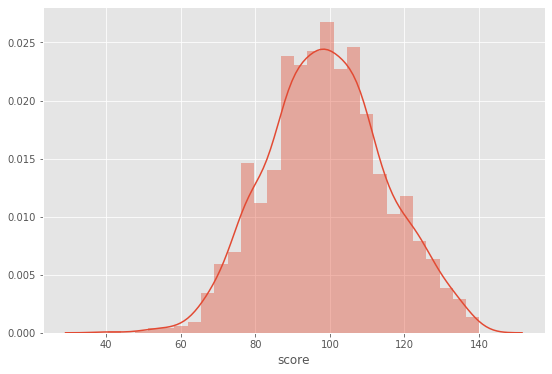

In [453]:
plt.figure(figsize=(9, 6))
sns.distplot(answer['score'])

In [431]:
HouseID = train.filter(['Id'])
HouseID = HouseID.join(answer['score'])

In [432]:
HouseID['score'].corr(train['SalePrice']) #finding correlation between scoring function and SalePrice

0.8049454994166824

In [433]:
HouseID = HouseID.sort_values('score',ascending = False)

###  10 Most Desirable Houses

In [434]:
HouseID.head(10)

,Id,score
691,692,140.16
798,799,138.66
309,310,138.49
440,441,137.66
389,390,137.33
224,225,137.33
185,186,136.66
1243,1244,136.33
278,279,136.33
11,12,136.16


In [435]:
HouseID = HouseID.sort_values('score')

###  10 Least Desirable Houses

In [436]:
HouseID.head(10)

,Id,score
533,534,40.50
375,376,51.00
39,40,52.50
705,706,52.50
1218,1219,56.50
636,637,56.83
250,251,59.00
1321,1322,60.00
1325,1326,61.50
88,89,62.00


<font size = "+1">What is the ten most desirable houses?</font>
- <font size = "+1">The following are the Id's of houses with highest scores from the scoring function</font>
  - <font size = "+1">692, 799, 310, 441, 390, 225, 186, 1244, 279, 12</font>

<font size = "+1">What is the ten least desirable houses?</font>
- <font size = "+1">The following are the Id's of houses with lowest scores from the scoring function</font>
  - <font size = "+1">534, 376, 40, 706, 1219, 637, 251, 1322, 1326, 89</font>

<font size = "+1">Describe your scoring function and how well you think it worked.</font>
- <font size = "+1"> In order to know if the scoring function is giving good results or not we can find the correlation between scores of all the houses and the salesprice of the houses. If there is a high positive correlation between those two colomns we can conclude that the scoring function is giving good results.</font>
  - <font size = "+1"> Correlation obtained: 0.8049</font>
- <font size = "+1">Also, the distplot of scores is similar to Guassian Distribution. So, we can assume that the scores obtained by the handcrafted scoring function are good. </font>

## Part 4 - Pairwise Distance Function

In [151]:
# TODO: code for distance function
q4 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')

In [152]:
q4 = q4.fillna(q4.median())
q4 = q4.fillna('not avilable')

In [159]:
res = pdist(q4, 'euclidean')
result = squareform(res)

In [165]:
print(result)

[[   0.          634.06466547  458.5040894  ... 1630.94297877
  1646.81935864 1619.51628581]
 [ 634.06466547    0.          679.03166347 ... 1701.52079035
  1572.36827747 1477.2735021 ]
 [ 458.5040894   679.03166347    0.         ... 1575.23236381
  1656.94055415 1641.68906922]
 ...
 [1630.94297877 1701.52079035 1575.23236381 ...    0.
  1000.54934911  953.80815681]
 [1646.81935864 1572.36827747 1656.94055415 ... 1000.54934911
     0.          476.81128342]
 [1619.51628581 1477.2735021  1641.68906922 ...  953.80815681
   476.81128342    0.        ]]


<font size = "+1">How well does the distance function work? When does it do well/badly?</font>
<font size = "+1"> computed a result (1460 x 1460) matrix in which result[i][j] of a matrix will give pair wise distance between the houses i and j. If the result[i][j] is less then it implies that both the houses are very similar to each other and will yield a similar sale price given that most of their attributes  match closely.</font>

<font size = "+1">It performs well(less pair wise distance) for the houses in same cluster and has a higher pairwise distance for the houses in different clusters. </font>

## Part 5 - Clustering

In [509]:
le = LabelEncoder()
q5 = train
q5 = q5.drop(['Id'], 1)
q5 = q5.drop(['Alley'], 1)
q5 = q5.drop(['PoolQC'], 1)
q5 = q5.drop(['Fence'], 1)
q5 = q5.drop(['MiscFeature'], 1)
q5 = q5.drop(['Neighborhood'], 1)

q5 = q5.fillna(q5.median())
q5 = q5.fillna('not avilable')
q5 = q5.apply(le.fit_transform)

In [510]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca_result = pca.fit_transform(q5)

In [511]:
import time

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.018s...
[t-SNE] Computed neighbors for 1460 samples in 0.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 99.139200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.797211
[t-SNE] KL divergence after 1000 iterations: 0.826005


In [512]:
res = pdist(tsne_results, 'cosine')
result = squareform(res)

In [437]:
#plt.scatter(tsne_results[:,0], tsne_results[:,1])

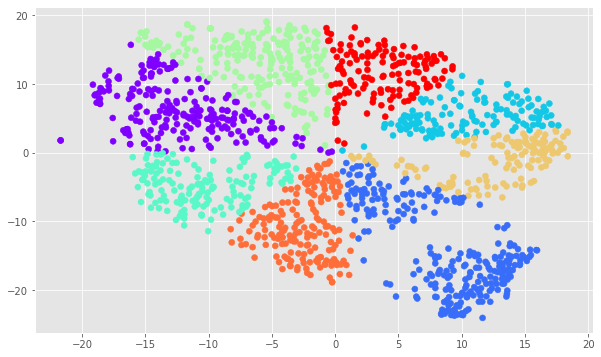

In [513]:
# TODO: code for clustering and visualization
#use dist matrix

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(result)
plt.figure(figsize=(12, 6))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmeans.labels_, cmap='rainbow')

In [516]:
coord_data = pd.DataFrame(tsne_results,columns=["pca-one","pca-two"])
coord_data["clusters"] = pd.Series(kmeans.labels_)
coord_data["Neighborhood"] = train["Neighborhood"]

In [551]:
# fig = plt.figure(figsize=(30,15))
# ax = fig.add_subplot(111)
# ax = sns.countplot(x="Neighborhood", hue="clusters", data=coord_data)

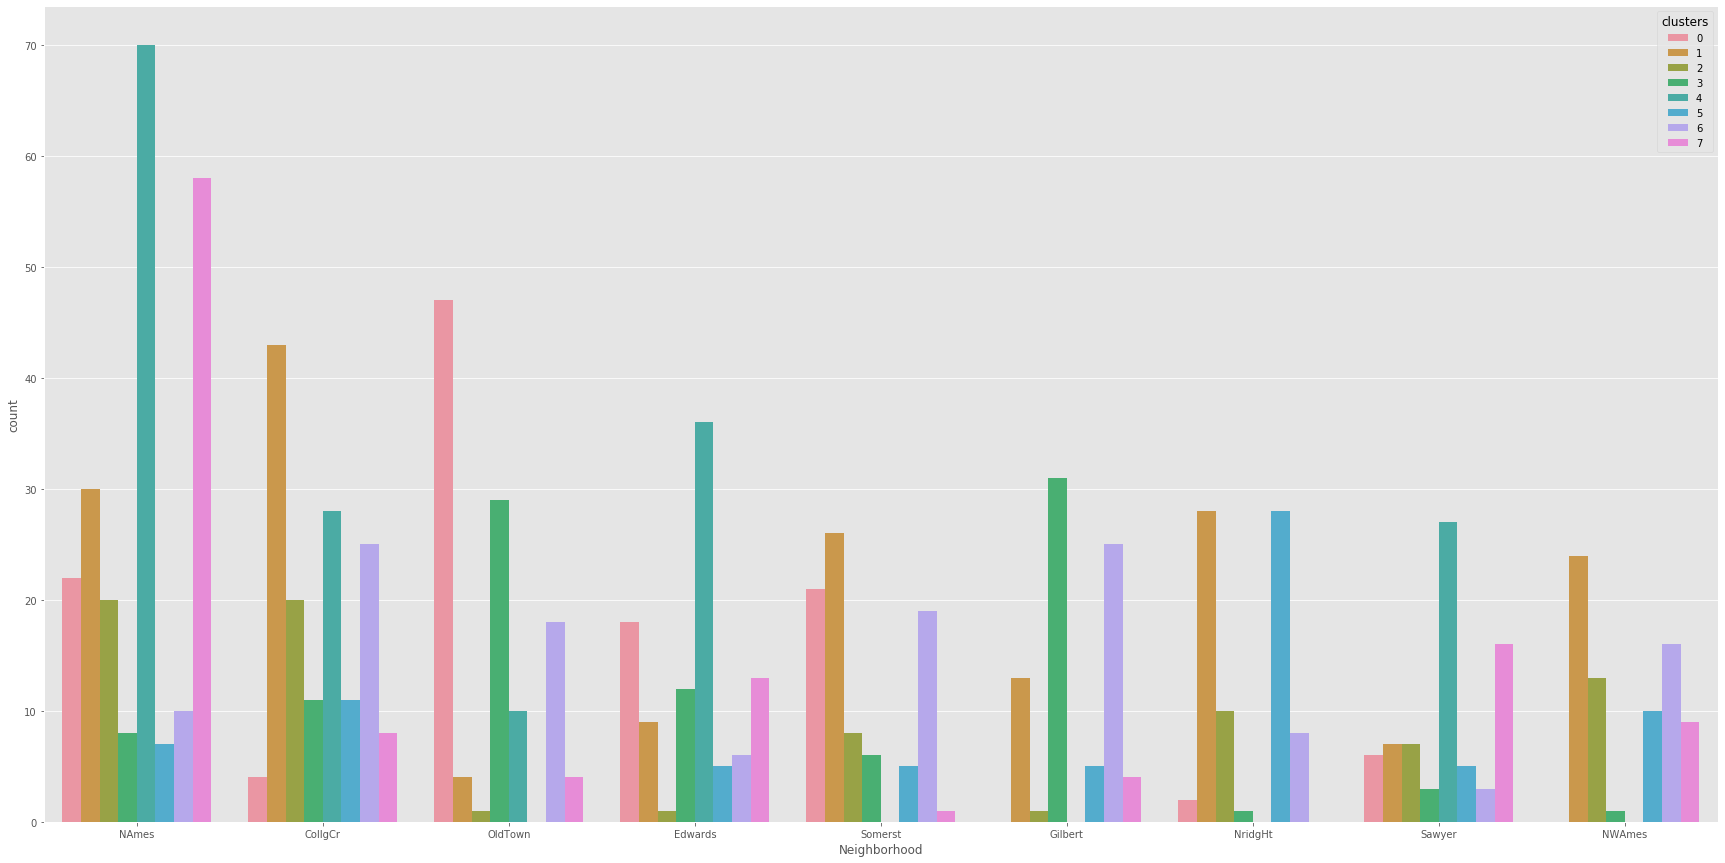

In [552]:
fig = plt.figure(figsize=(30,15))
ax = sns.countplot(x="Neighborhood", hue="clusters", data=coord_data,order=coord_data.Neighborhood.value_counts().iloc[:9].index)

<font size = +1>How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.</font>

<font size = +1>I am reducing the dimensions of the original dataframe from 80(Neighborhood is dropped  at the beginning) to 50 columns using PCA and then reducing the dimensions even further using t-distributed Stochastic Neighbor Embedding (TSNE). I'm calculating the eucledian distance of each columns for each houses and plotted the clusters using kmeans cluster. The boundaries between the different clusters are visible and only very few of the houses in borders are colliding. So, we can say that the clusters have good boundaries and the clustering function was good.</font>

## Part 6 - Linear Regression

<font size = +1>Creating a dataframe "q6" from train.csv and filtering only 17 colomns which I think are interesting. And then cleaned the data by filling Nan Values with median and 'not available' for numerical features and categorical features respectively.Then, label encoded on caterogical values and convreted them into numerical. Finally, performed linear regression on the data.</font>

In [5]:
# TODO: code for linear regression
Y = train.filter(['SalePrice'])

In [11]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [6]:
q6 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')

In [7]:
q6 = q6.filter(['LotFrontage','LotArea','LotShape','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','BedroomAbvGr','Fireplaces','GarageCars','GarageArea','GarageQual','FireplaceQu','KitchenQual']) 

In [8]:
le = LabelEncoder()
q6 = q6.fillna(q6.median())
q6 = q6.fillna('not avilable')
q6 = q6.apply(le.fit_transform)

In [9]:
feature,result = q6.loc[:,q6.columns != 'SalePrice'], Y.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(feature,result, test_size=0.2)

lm = LinearRegression().fit(X_train,y_train)

y_pred = lm.predict(X_test)

###### rmse obtained for log(saleprice):  0.2069

In [10]:
rmse = np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_pred)))
print('Root Mean Squared Error:'+str(rmse))

Root Mean Squared Error:0.18643510863507795


In [371]:
def plot_top_coefficients(model, top_n = 10):

    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_coefficients = pd.DataFrame(zipped).head(top_n).sort_values(1)
    bottom_coefficients = pd.DataFrame(zipped).tail(top_n).sort_values(1,ascending=True)
    combined = pd.concat([bottom_coefficients,top_coefficients], axis=0)
    combined.columns = ['Feature', 'Coefficient']
    return combined

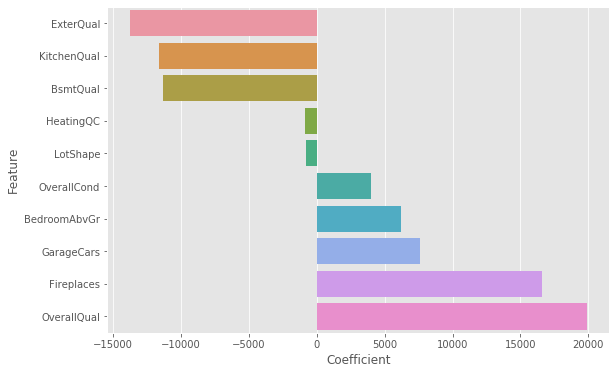

In [372]:
plt.figure(figsize=(9, 6))
combined= plot_top_coefficients(lm, 5)
ax = sns.barplot(x='Coefficient', y='Feature', data=combined)
plt.show()

<font size = "+1">How well/badly does it work? Which are the most important variables?</font>
 - <font size = "+1">Inorder to check wether the model performed well/bad I calculated the RMSE value of log(saleprice) and got a value of 0.2069. I consider this a good score because I have taken only 17 columns and still got a score of 0.2069.</font>
 - <font size = "+1">To find the most important varibles I drew a plot which contains top 5 variables with highest coefficients for prediction.</font>
    - <font size = "+1">OverallQual</font>
    - <font size = "+1">Fireplaces</font>
    - <font size = "+1">GarageCars</font>
    - <font size = "+1">BedroomAbvGr</font>
    - <font size = "+1">OverallCond</font>


## Part 7 - External Dataset

In [628]:
# TODO: code to import external dataset and test
x = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\inflation.csv')
q7 =pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')

def getYear(a):
    for i in range(len(a)):
        a[i] = int(a[i][0:4])
    return a

a=x['date'].to_list()
x['YrSold'] = getYear(a)
x.drop(['date'], axis=1, inplace=True)
final= pd.merge(q7, x, on='YrSold')

#final.sample(5)

In [629]:
Y7 = train.filter(['SalePrice'])
Y7 = np.log(Y7)


# final = final.drop(['Id'], 1)
# final = final.drop(['Alley'], 1)
# final = final.drop(['PoolQC'], 1)
# final = final.drop(['Fence'], 1)
# final = final.drop(['MiscFeature'], 1)

le = LabelEncoder()

final = final.fillna(final.median())
final = final.fillna('not avilable')

final = final.apply(le.fit_transform)

In [632]:
feature,result = final.loc[:,final.columns != 'SalePrice'], Y7.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(feature,result, test_size=0.3)

# alphas = np.logspace(-6,9,12)
# ridgecv = RidgeCV(alphas=alphas)

# ridgecv.fit(X_train,y_train)
# ridgecv_pred = ridgecv.predict(X_test)


lm = LinearRegression().fit(X_train,y_train)

y_pred = lm.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:'+str(rmse))


# ridgereg = Ridge(alpha=0.6, normalize=True)
# ridgereg.fit(X_train,y_train)
# ridge_pred = ridgereg.predict(X_test)


Root Mean Squared Error: 0.129


<font size = +1>Describe the dataset and whether this data helps with prediction.</font>
 - <font size = +1> External DataSet:
Although the given data is enough to accurately determine the saleprice with a RMSE of 0.134 some other external data sets such as crime rate at a location or a particular climate or vicinity to big cities and increasing land prices per year have an impact on determining the House sale price.</font>
    
 - <font size = +1>In the imported data I have date into year sold by passing it into the get year method. and then I am merging the newly converted data with my original data.</font>

 - <font size = +1>I have used the inflation values of a particular land price to determine a house price because the land cost has a huge influence on determining the house price from this link https://www.macrotrends.net/2497/historical-inflation-rate-by-year. By merging the two data sets, I calculated the RMSE value using the ridgeprediction and got a RMSE value of 0.129
Although not by much this data set improves the accuracy by a small margin. So, there can be other external data sets which can be integrated with the current data to further improve the accuracy. </font>

## Part 8 - Permutation Test

<font size = +1>Creating a q8 dataframe and cleaning all the NaN values and then label encoding on the data frame.</font>
- <font size = +1> Taking a list 'columns' with 5 good variables and 5 meaningless variables</font>

In [545]:
q8 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')

In [546]:
# TODO: code for all permutation tests

le = LabelEncoder()
result = q8.filter(['SalePrice'])
#variable = q8.filter(['OverallCond'])
q8 = q8.fillna(q8.median())
q8 = q8.fillna('not available')
q8 = q8.apply(le.fit_transform)

#fig = plt.figure(figsize=(8,8))

In [547]:
columns = ['YearRemodAdd','TotRmsAbvGrd','YearBuilt','GarageCars','GarageArea','YrSold','MSSubClass','OverallCond','MiscVal','Condition2']

<font size = +1>Calculating the pvalue and rmse scores for each of the 10 variables.</font>
- <font size = +1>Plotting the rmse val of the original variable and rsme values of its permuted list(doing 100 permutations)</font>
- <font size = +1>For good variables we are expecting to see a p val very less(i.e line of p-val in the plot will be on the left most side). For meaningless variables we are expecting to see a pval higher(i.e line of p-val in the plot will be somewhere in between the scores).</font>

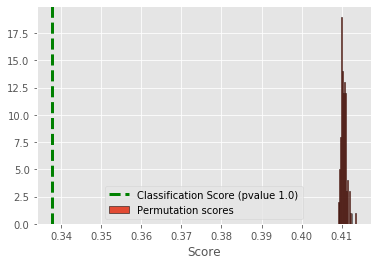

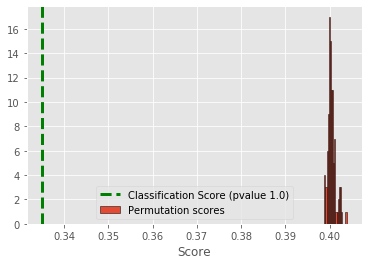

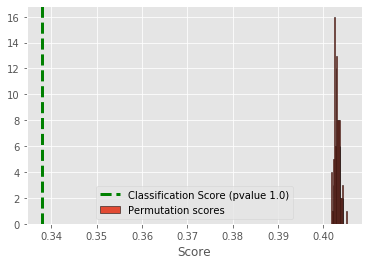

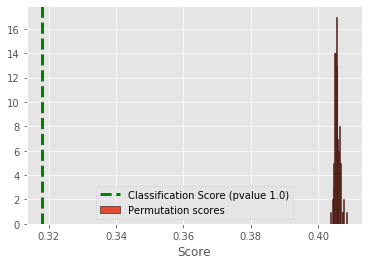

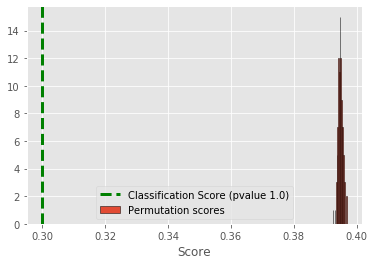

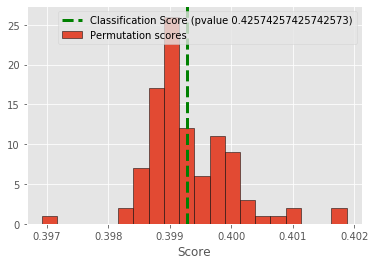

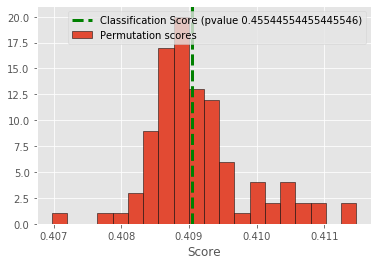

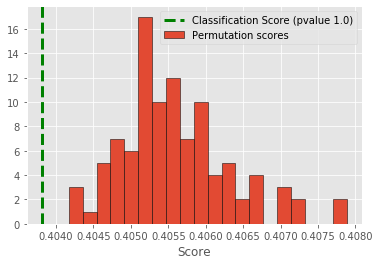

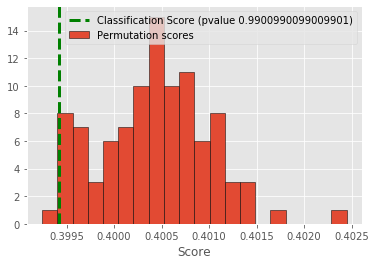

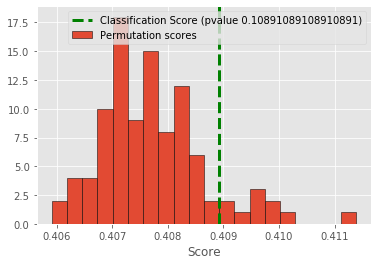

In [548]:

from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer



def rmsle(true, pred):
    #true, pred = np.exp(true), np.exp(pred)
    return -np.sqrt(metrics.mean_squared_error(np.log(true), np.log(pred)))

for param in list(columns):
    variable = q8.filter([param])
    X_train, X_test, y_train, y_test = train_test_split(variable,result, test_size=0.2)
    lm = LinearRegression()#.fit(X_train,y_train)
    rmsle_score = make_scorer(rmsle, greater_is_better=False)
    score, permutation_scores, pvalue = permutation_test_score(lm, X_train, y_train,scoring = rmsle_score,cv=3, n_permutations=100, n_jobs=1)
    #print(pvalue)
    #print(score)
    plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
#     plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')
    #fig = plt.figure(figsize=(12,8))
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

- <font size = +1>For Columns which had high co-relation value we can see that the RMSE value for shuffled cases is much higher than the original RMSE value implying that this value when altered/shuffled will impact the error in predicting the sale price.</font>

- <font size = +1>For columns which had low co-relation we can see that the RMSE value for shuffled cases doesn't vary that much compared to the original RMSE values implying that in this case even altering the values wouldn't much impact in predicting the sale price.</font>

## Part 9 - Prediction Model

- <font size = "+1">Reading the train.csv into a data frame and naming it "q9". Now, dropping 4 colomns which have more than 95% NaN values, they are 'Alley', 'PoolQC', 'Fence', 'MiscFeature'. Also dropping the 'Id' field as it doesnt have any affect on the predictions.</font>
- <font size = "+1">Creating a dataframe Y9 with only one colomn 'SalePrice'.</font>
- <font size = "+1">In the "q9" dataframe, for numerical features, if there is a Nan value replacing it with median.</font>
- <font size = "+1">In the "q9" dataframe, for cateforical features, if there is a Nan value replacing it with 'not available' </font>
- <font size = "+1">In my dataframe all the Nan Values are removed. Now, I am performing LabelEnconding on categorical features  and converting them into numerical types.</font>


In [601]:
Y9 = train.filter(['SalePrice'])
Y9 = np.log(Y9)

In [602]:
q9 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\train.csv')
q9 = q9.drop(['Id'], 1)
q9 = q9.drop(['Alley'], 1)
q9 = q9.drop(['PoolQC'], 1)
q9 = q9.drop(['Fence'], 1)
q9 = q9.drop(['MiscFeature'], 1)


le = LabelEncoder()
q9 = q9.fillna(q9.median())
q9 = q9.fillna('not avilable')
q9 = q9.apply(le.fit_transform)

feature,result = q9.loc[:,q9.columns != 'SalePrice'], Y9.loc[:,'SalePrice']

- <font size = "+1">Splitting the train and test data into 80:20 ratio.</font>
- <font size = "+1">Using RidgeCV regression with np.logspace(-6,9,12) and predicting the sales price into reidgecv_pred using X_test</font>
- <font size = "+1"> Finally calculating RMSE value.</font>

In [603]:
#Y9 = train.filter(['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(feature,result, test_size=0.2)

#lm = LinearRegression().fit(X_train,y_train)

#y_pred = lm.predict(X_test)

alphas = np.logspace(-6,9,12)
ridgecv = RidgeCV(alphas=alphas)

# ridgereg = Ridge(alpha=0.6, normalize=True)
# ridgereg.fit(X_train,y_train)
# ridge_pred = ridgereg.predict(X_test)


ridgecv.fit(X_train,y_train)
ridgecv_pred = ridgecv.predict(X_test)



#### RMSE of log(salePrice): 0.134

In [604]:

rmse = np.sqrt(metrics.mean_squared_error(y_test, ridgecv_pred))

print('Root Mean Squared Error:'+str(rmse))

Root Mean Squared Error:0.1345646243473087


- <font size = "+1"> Reading the test.csv into a new dataframe "test9". Now, dropping 4 colomns which have more than 95% NaN values, they are 'Alley', 'PoolQC', 'Fence', 'MiscFeature'. Also dropping the 'Id' field as it doesnt have any affect on the predictions.</font>
- <font size = "+1">In the "test9" dataframe, for numerical features, if there is a Nan value replacing it with median.</font>
- <font size = "+1">In the "test9" dataframe, for cateforical features, if there is a Nan value replacing it with 'not available' </font>
- <font size = "+1">In my dataframe all the Nan Values are removed. Now, I am performing LabelEnconding on categorical features  and converting them into numerical types.</font>
- <font size = "+1"> Storing the results into res_pred using ridgecv.predict on "test9"</font>

In [314]:
test9 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\test.csv')

test9 = test9.drop(['Id'], 1)
test9 = test9.drop(['Alley'], 1)
test9 = test9.drop(['PoolQC'], 1)
test9 = test9.drop(['Fence'], 1)
test9 = test9.drop(['MiscFeature'], 1)


le = LabelEncoder()
test9 = test9.fillna(test9.median())
test9 = test9.fillna('not avilable')
test9 = test9.apply(le.fit_transform)

#res_pred = lm.predict(test9)

#res_pred = ridgereg.predict(test9)

res_pred = ridgecv.predict(test9)


- <font size = "+1"> Creating a dataframe with 2 colomns. First colomn is Id ad second is the predicted SalePrice.</font>
- <font size = "+1"> Converting the data into CSV and uploading it on KAGGLE!</font>


In [315]:
test_9 = pd.read_csv(r'C:\Users\preet\Desktop\house-prices-advanced-regression-techniques\test.csv')

res9 = pd.DataFrame()
res9['Id'] = test_9['Id']
res9['SalePrice'] = np.exp(res_pred)

res9.to_csv('ridgeCV_3.csv', index=False)

## Part 10 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/preetham17

Highest Rank: 1635

Kaggle Score: 0.12751

Number of entries: 8

INCLUDE IMAGE OF YOUR KAGGLE RANKING 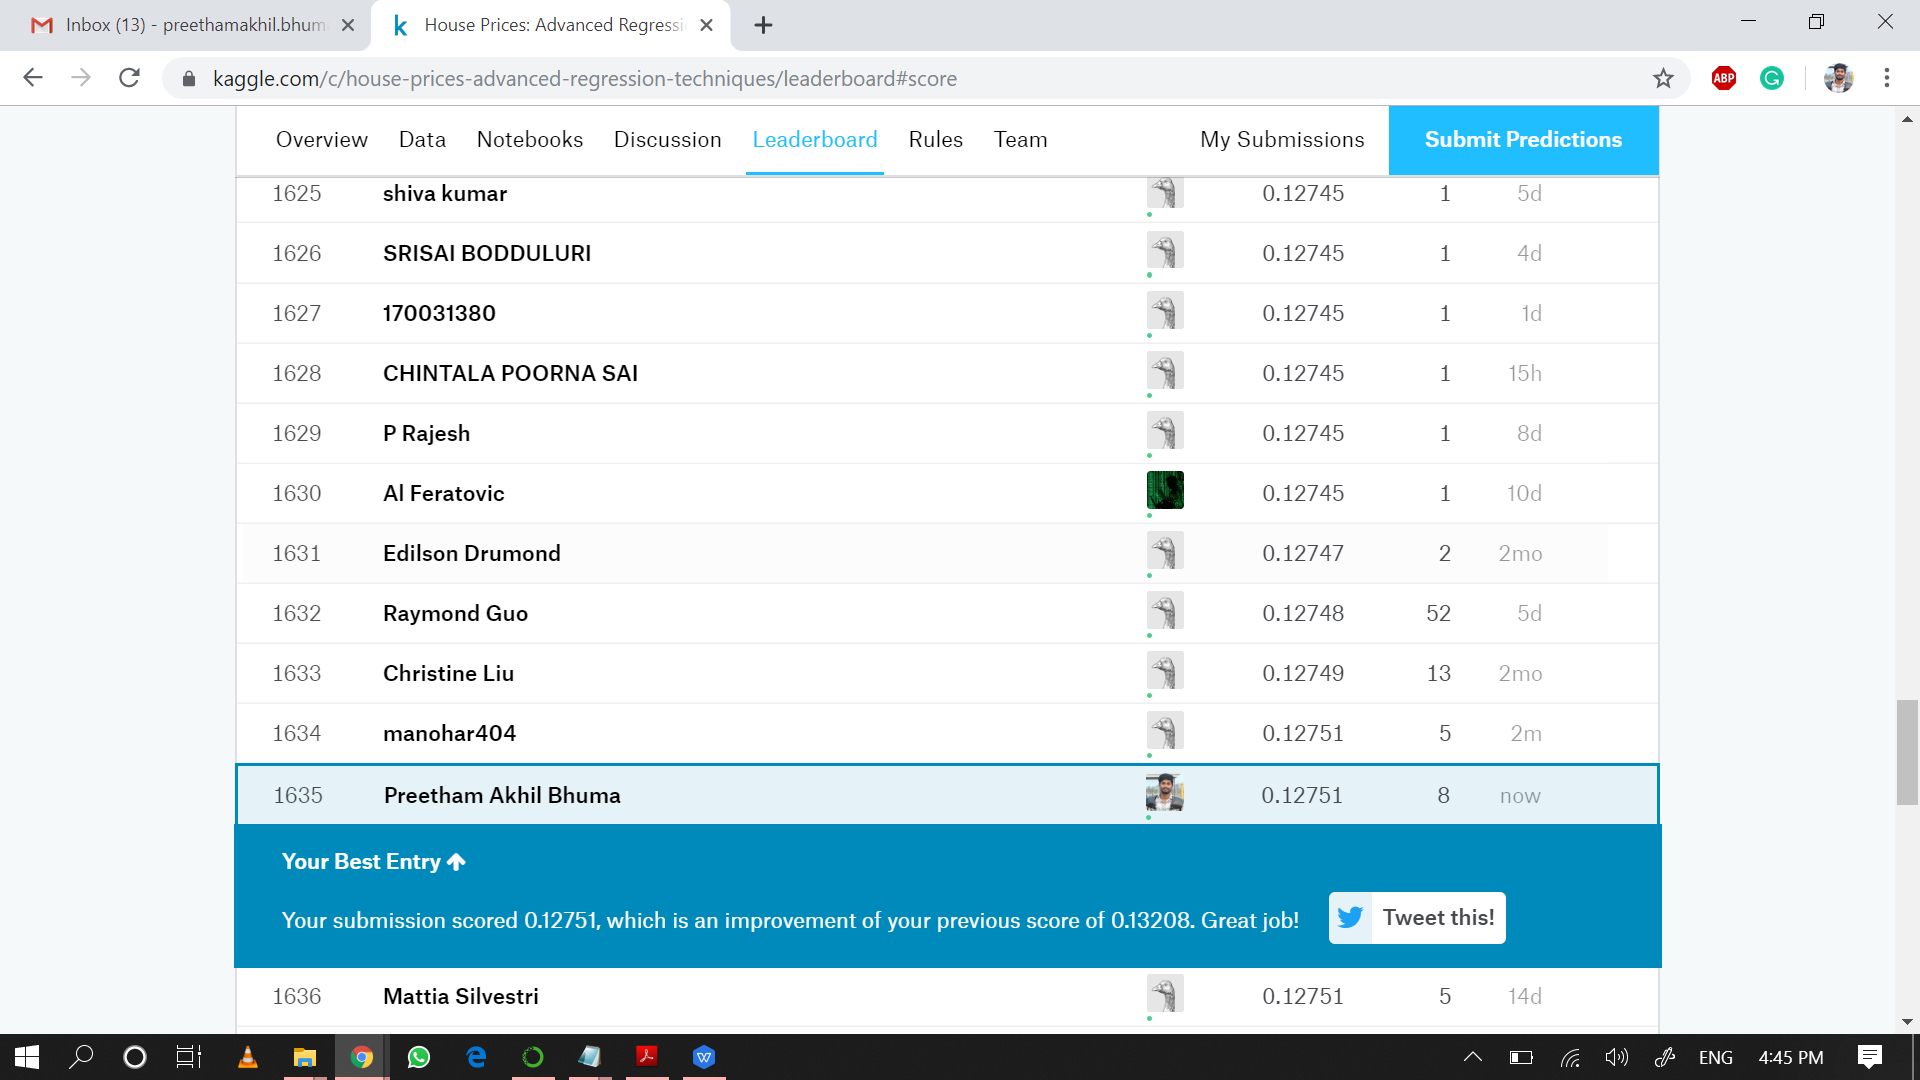